![](../lab%20header%20image.png)

<div style="text-align: center;">
    <h3>Experiment No. 8</h3>
</div>

<img src="../Student%20Information.png" style="width: 100%;" alt="Student Information">

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>AIM</strong>
</div>

**To perform circle detection using hough transform using opencv**

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>Theory/Procedure/Algorithm</strong>
</div>

The Hough Transform is a feature extraction technique used in image analysis, particularly for detecting regular shapes like lines, circles, or ellipses. It transforms the problem of detecting objects into a parameter space, where each point in the image votes for a possible shape, making it robust against noise and occlusion.

#### Circle Detection Using Hough Transform:
Circle detection is a specific case of the Hough Transform. A circle can be defined in terms of its parameters:

- **(a, b):** The center of the circle.
- **r:** The radius of the circle.

The parametric equation of a circle is:

$$
(x - a)^2 + (y - b)^2 = r^2
$$

Where $(x, y)$ are the coordinates of the points on the circumference of the circle, and $(a, b)$ are the center coordinates, with $r$ being the radius.

In the Hough Circle Transform, the algorithm tries to find the values of $(a, b, r)$ that best fit the points in the image. The basic steps are:

1. Edge detection using an edge detector, such as the Canny edge detector.
2. Accumulation in a parameter space, where the algorithm finds potential circle centers and radii.
3. Voting scheme to select the best possible circle candidates by analyzing peaks in the accumulator matrix.

#### Steps in Circle Detection:
1. **Preprocessing**: Convert the input image to grayscale and reduce noise using a Gaussian blur.
2. **Edge Detection**: Apply an edge detection algorithm like Canny to identify potential circle boundaries.
3. **Hough Circle Transform**: Use OpenCV’s `HoughCircles()` function to detect circles by mapping points in the image space to the parameter space (center and radius).
4. **Post-processing**: Draw the detected circles on the image for visualization.


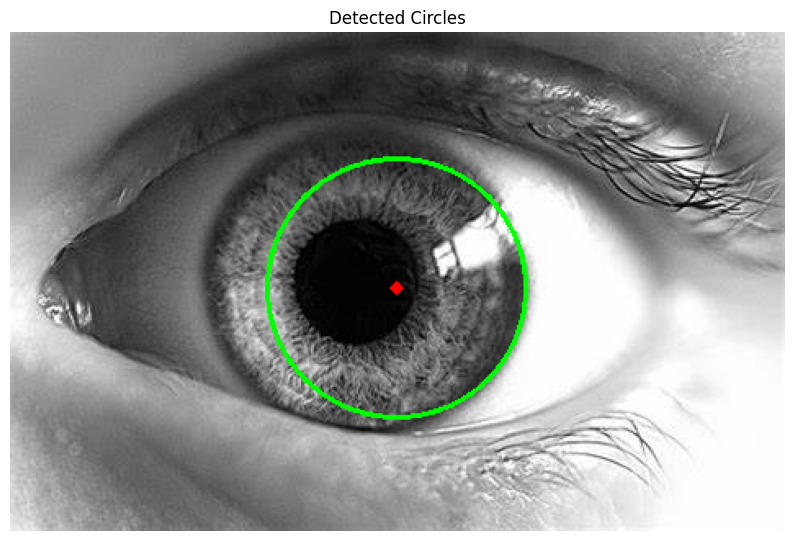

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_circles(image_path, min_radius_ratio=0.02, max_radius_ratio=0.5, 
                   param1=50, param2=30, min_dist_ratio=0.1):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        raise ValueError("Image not found or unable to load image")
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Get image dimensions
    height, width = blurred.shape
    min_dim = min(height, width)
    
    # Calculate min and max radii based on image size
    min_radius = int(min_dim * min_radius_ratio)
    max_radius = int(min_dim * max_radius_ratio)
    min_dist = int(min_dim * min_dist_ratio)
    
    # Hough Circle Transform
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=min_dist,
        param1=param1,
        param2=param2,
        minRadius=min_radius,
        maxRadius=max_radius
    )
    
    # Ensure some circles have been detected
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw the outer circle
            cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)
    
    # Display the result using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Circles')
    plt.axis('off')
    plt.show()

# Example usage
detect_circles('input.jpg', param1=50, param2=30, min_radius_ratio=0.1, max_radius_ratio=0.3, min_dist_ratio=100)

# You can adjust parameters as needed, for example:
# detect_circles('input.jpg', min_radius_ratio=0.05, max_radius_ratio=0.3, param1=70, param2=40, min_dist_ratio=0.2)

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>CONCLUSION</strong>
</div>

The experiment successfully demonstrates the use of the Hough Circle Transform for detecting circles in images using OpenCV. The results showed that circles can be accurately detected based on edge information and parameter tuning (such as circle radius and center detection threshold). Preprocessing, including Gaussian blur and Canny edge detection, improved the robustness of the method against noise and edges.

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>ASSESSMENT</strong>
</div>

<img src="../marks_distribution.png" style="width: 100%;" alt="marks_distribution">